In [1]:
import math
import pandas as pd
import arrow
import ipynb 
import os.path
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from dotenv import load_dotenv
from networkx.algorithms import bipartite
from importlib import reload

load_dotenv(verbose=True)

import pandas as pd
pd.options.mode.chained_assignment = None  

In [2]:
# import functions from py file 

import function
reload(function)
from function import CB_data_cleaning, df_from_api_CB, extract_nodes, extract_data_from_column
from function import nx_dip_graph_from_pandas, plot_bipartite_graph, filter_dict
from function import extract_classes_company_tech, degree_bip, insert_data_classes

In [3]:
# import classes 

import classes
reload(classes)
from classes import Company, Investor, Technology

In [11]:
df_start = pd.read_csv("data/data_cb/investments.csv")

In [12]:
df_start.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,True
1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock investment in Series B - Facebook,investment,greylock-invested-in-facebook-series-b--6fae39...,https://www.crunchbase.com/investment/greylock...,NaN,2007-05-27 06:09:36,2018-02-13 00:53:20,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock,organization,True
2,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,meritech-capital-partners-invested-in-facebook...,https://www.crunchbase.com/investment/meritech...,NaN,2007-05-27 06:09:36,2019-03-27 19:50:32,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,organization,True
3,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,trinity-ventures-invested-in-photobucket-serie...,https://www.crunchbase.com/investment/trinity-...,NaN,2007-05-29 11:05:59,2018-02-13 00:55:58,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,organization,NaN
4,581c4b38-9653-7117-9bd4-7ffe5c7eba69,Founders Fund investment in Series A - Geni,investment,founders-fund-invested-in-geni-series-a--60e6a...,https://www.crunchbase.com/investment/founders...,NaN,2007-05-31 20:19:28,2018-02-13 00:53:04,60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c,Founders Fund,organization,True


In [18]:
df_start.loc[0]

uuid                               524986f0-3049-54a4-fa72-f60897a5e61d
name                            Accel investment in Series A - Facebook
type                                                         investment
permalink             accel-invested-in-facebook-series-a--d950d7a5-...
cb_url                https://www.crunchbase.com/investment/accel-in...
rank                                                                NaN
created_at                                          2007-05-27 06:09:10
updated_at                                          2018-02-13 00:52:57
funding_round_uuid                 d950d7a5-79ff-fb93-ca87-13386b0e2feb
funding_round_name                                  Series A - Facebook
investor_uuid                      b08efc27-da40-505a-6f9d-c9e14247bf36
investor_name                                                     Accel
investor_type                                              organization
is_lead_investor                                                

In [13]:
df_start.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'funding_round_uuid', 'funding_round_name',
       'investor_uuid', 'investor_name', 'investor_type', 'is_lead_investor'],
      dtype='object')

In [14]:
to_drop = [
    'type',
    'permalink',
    'cb_url',   
    'rank',
    'created_at',
    'updated_at',
    'investor_type',
    'is_lead_investor'
]

# to_rename = { 'category_groups_list': 'category_groups' }
to_rename = { 'category_list': 'category_groups' }

drop_if_nan = [
    'name'
]

to_check_double = {}

sort_by = ""

In [15]:
df = CB_data_cleaning(df_start, to_drop, to_rename, to_check_double, drop_if_nan, sort_by)

In [16]:
df.columns

Index(['uuid', 'name', 'funding_round_uuid', 'funding_round_name',
       'investor_uuid', 'investor_name', 'investor_type', 'is_lead_investor'],
      dtype='object')

In [17]:
df.loc[0]

uuid                     524986f0-3049-54a4-fa72-f60897a5e61d
name                  Accel investment in Series A - Facebook
funding_round_uuid       d950d7a5-79ff-fb93-ca87-13386b0e2feb
funding_round_name                        Series A - Facebook
investor_uuid            b08efc27-da40-505a-6f9d-c9e14247bf36
investor_name                                           Accel
investor_type                                    organization
is_lead_investor                                         True
Name: 0, dtype: object

In [4]:
"""# create query API:

num_lines = 1000

query = {
    "field_ids": [
        "announced_on",
        "funding_round_identifier",
        "funding_round_money_raised",
        "identifier",
        "investor_identifier",
        "investor_stage",
        "investor_type",
        "money_invested",
        "name",
        "organization_identifier"
    ],
    "limit": num_lines
}

df = df_from_api_CB (query, "investments")"""

In [5]:
df.head()

,uuid,properties.name,properties.identifier.entity_def_id,properties.identifier.permalink,properties.identifier.uuid,properties.identifier.value,properties.investor_stage,properties.announced_on,properties.organization_identifier.permalink,properties.organization_identifier.image_id,...,properties.investor_identifier.image_id,properties.investor_identifier.uuid,properties.investor_identifier.entity_def_id,properties.investor_identifier.value,properties.funding_round_money_raised.value_usd,properties.funding_round_money_raised.currency,properties.funding_round_money_raised.value,properties.money_invested.value_usd,properties.money_invested.currency,properties.money_invested.value
0,000037b5-43aa-8f64-a7d0-f88ca7700011,Mobile Internet Capital investment in Venture ...,investment,mobile-internet-capital-invested-in-techpoint-...,000037b5-43aa-8f64-a7d0-f88ca7700011,Mobile Internet Capital investment in Venture ...,[late_stage_venture],2014-05-01,techpoint-2,alkfq4bmnadrhgb8femn,...,v1397179495/dff2bd9e87693c73845d0c6407b526c6.jpg,3902b797-c0f1-bac1-b60b-ae92cd65167c,organization,Mobile Internet Capital,NaN,NaN,NaN,NaN,NaN,NaN
1,00007c23-12ab-40e6-91f8-4863680a7023,M28 Capital investment in Series A - Adagio Th...,investment,m28-capital-invested-in-adagio-therapeutics-se...,00007c23-12ab-40e6-91f8-4863680a7023,M28 Capital investment in Series A - Adagio Th...,[early_stage_venture],2020-07-16,adagio-therapeutics,rodsmjmo5rmmfd7t84tk,...,NaN,21d0c0ba-3be8-4d72-b951-77acae886159,organization,M28 Capital,50000000.0,USD,50000000.0,NaN,NaN,NaN
2,00007f2b-2bcc-43d5-93e4-6aef70098b62,Viva Ventures Biotech Fund investment in Serie...,investment,viva-ventures-biotech-group-invested-in-ripari...,00007f2b-2bcc-43d5-93e4-6aef70098b62,Viva Ventures Biotech Fund investment in Serie...,"[early_stage_venture, late_stage_venture, seed]",2018-10-12,riparian-pharmaceuticals,i7klm7dgpaaxnzpexbfw,...,cl4pupv695kdt89by0jm,328b7057-c2bc-47b3-a18e-474373f66e94,organization,Viva Ventures Biotech Fund,3000000.0,USD,3000000.0,NaN,NaN,NaN
3,00009752-94f1-43a7-b300-25fc9b5615e0,PNB-INSPiRE Ethical Fund 1 Investment Business...,investment,pnb-inspire-ethical-fund-1-investment-business...,00009752-94f1-43a7-b300-25fc9b5615e0,PNB-INSPiRE Ethical Fund 1 Investment Business...,NaN,2017-09-11,green-earth-institute,v1426667246/noffh0asw4xzodovdgg8.png,...,ujajq9ncqfy64aozmmmv,bd2f92db-cfac-4254-b40f-7769e2a9e77c,organization,PNB-INSPiRE Ethical Fund 1 Investment Business...,1837235.0,JPY,201000000.0,NaN,NaN,NaN
4,0000c5b0-00e6-42ff-bc71-a3302df61d5b,Next Play Capital investment in Series E - Carbon,investment,next-world-capital-2-invested-in-carbon3d-seri...,0000c5b0-00e6-42ff-bc71-a3302df61d5b,Next Play Capital investment in Series E - Carbon,"[early_stage_venture, late_stage_venture, vent...",2019-06-25,carbon3d,fuqdtu9kldmzqpvq00kf,...,mbjghgkrjzwwznjgpbyp,07ea3729-13a3-4cba-73f2-dc4f695ff1e7,organization,Next Play Capital,260000000.0,USD,260000000.0,NaN,NaN,NaN


In [6]:
list(df.columns)

['uuid',
 'properties.name',
 'properties.identifier.entity_def_id',
 'properties.identifier.permalink',
 'properties.identifier.uuid',
 'properties.identifier.value',
 'properties.investor_stage',
 'properties.announced_on',
 'properties.organization_identifier.permalink',
 'properties.organization_identifier.image_id',
 'properties.organization_identifier.uuid',
 'properties.organization_identifier.entity_def_id',
 'properties.organization_identifier.value',
 'properties.funding_round_identifier.permalink',
 'properties.funding_round_identifier.image_id',
 'properties.funding_round_identifier.uuid',
 'properties.funding_round_identifier.entity_def_id',
 'properties.funding_round_identifier.value',
 'properties.investor_type',
 'properties.investor_identifier.permalink',
 'properties.investor_identifier.image_id',
 'properties.investor_identifier.uuid',
 'properties.investor_identifier.entity_def_id',
 'properties.investor_identifier.value',
 'properties.funding_round_money_raised.val

In [7]:
to_drop = [
    "uuid", 
    "properties.identifier.entity_def_id", 
    "properties.identifier.permalink",
    "properties.identifier.uuid",
    "properties.money_invested.value_usd", 
    "properties.funding_round_identifier.uuid",
    "properties.money_invested.currency", 
    "properties.investor_identifier.image_id",
    "properties.investor_identifier.uuid",
    "properties.money_invested.value", 
    "properties.organization_identifier.permalink",
    "properties.identifier.value",
    "properties.organization_identifier.image_id",
    "properties.organization_identifier.uuid",
    "properties.organization_identifier.entity_def_id",
    "properties.funding_round_identifier.permalink",
    "properties.funding_round_identifier.image_id",
    "properties.name"
]

to_rename = {
    'properties.investor_identifier.value': 'investor_name', 
    'properties.organization_identifier.value': 'organisation_name',
    'properties.funding_round_money_raised.value_usd': 'investments_usd'
}

to_check_double = {}


sort_by = ""

In [8]:
df = CB_data_cleaning(df, to_drop, to_rename, to_check_double, sort_by)

In [9]:
df.head()

,properties.investor_stage,properties.announced_on,organisation_name,properties.funding_round_identifier.entity_def_id,properties.funding_round_identifier.value,properties.investor_type,properties.investor_identifier.permalink,properties.investor_identifier.entity_def_id,investor_name,investments_usd,properties.funding_round_money_raised.currency,properties.funding_round_money_raised.value
0,[late_stage_venture],2014-05-01,Techpoint,funding_round,Venture Round - Techpoint,[venture_capital],mobile-internet-capital,organization,Mobile Internet Capital,NaN,NaN,NaN
1,[early_stage_venture],2020-07-16,Adagio Therapeutics,funding_round,Series A - Adagio Therapeutics,[venture_capital],m28-capital,organization,M28 Capital,50000000.0,USD,50000000.0
2,"[early_stage_venture, late_stage_venture, seed]",2018-10-12,Riparian Pharmaceuticals,funding_round,Series A - Riparian Pharmaceuticals,[venture_capital],viva-ventures-biotech-group,organization,Viva Ventures Biotech Fund,3000000.0,USD,3000000.0
3,NaN,2017-09-11,Green Earth Institute,funding_round,Venture Round - Green Earth Institute,[fund_of_funds],pnb-inspire-ethical-fund-1-investment-business...,organization,PNB-INSPiRE Ethical Fund 1 Investment Business...,1837235.0,JPY,201000000.0
4,"[early_stage_venture, late_stage_venture, vent...",2019-06-25,Carbon,funding_round,Series E - Carbon,"[fund_of_funds, syndicate, venture_capital]",next-world-capital-2,organization,Next Play Capital,260000000.0,USD,260000000.0


In [10]:
df_essential = df[["organisation_name", "investor_name", "investments_usd"]]
df_essential.head()

,organisation_name,investor_name,investments_usd
0,Techpoint,Mobile Internet Capital,NaN
1,Adagio Therapeutics,M28 Capital,50000000.0
2,Riparian Pharmaceuticals,Viva Ventures Biotech Fund,3000000.0
3,Green Earth Institute,PNB-INSPiRE Ethical Fund 1 Investment Business...,1837235.0
4,Carbon,Next Play Capital,260000000.0


In [11]:
# set index
df_index = df.set_index(["investor_name", "organisation_name"])
df_index.head()

,,properties.investor_stage,properties.announced_on,properties.funding_round_identifier.entity_def_id,properties.funding_round_identifier.value,properties.investor_type,properties.investor_identifier.permalink,properties.investor_identifier.entity_def_id,investments_usd,properties.funding_round_money_raised.currency,properties.funding_round_money_raised.value
investor_name,organisation_name,,,,,,,,,,
Mobile Internet Capital,Techpoint,[late_stage_venture],2014-05-01,funding_round,Venture Round - Techpoint,[venture_capital],mobile-internet-capital,organization,NaN,NaN,NaN
M28 Capital,Adagio Therapeutics,[early_stage_venture],2020-07-16,funding_round,Series A - Adagio Therapeutics,[venture_capital],m28-capital,organization,50000000.0,USD,50000000.0
Viva Ventures Biotech Fund,Riparian Pharmaceuticals,"[early_stage_venture, late_stage_venture, seed]",2018-10-12,funding_round,Series A - Riparian Pharmaceuticals,[venture_capital],viva-ventures-biotech-group,organization,3000000.0,USD,3000000.0
PNB-INSPiRE Ethical Fund 1 Investment Business Limited Liability Partnership,Green Earth Institute,NaN,2017-09-11,funding_round,Venture Round - Green Earth Institute,[fund_of_funds],pnb-inspire-ethical-fund-1-investment-business...,organization,1837235.0,JPY,201000000.0
Next Play Capital,Carbon,"[early_stage_venture, late_stage_venture, vent...",2019-06-25,funding_round,Series E - Carbon,"[fund_of_funds, syndicate, venture_capital]",next-world-capital-2,organization,260000000.0,USD,260000000.0


In [12]:
# delete value with NaN investments

df_essential.dropna(subset = ["investments_usd"], inplace=True)

df_essential.head()

,organisation_name,investor_name,investments_usd
1,Adagio Therapeutics,M28 Capital,50000000.0
2,Riparian Pharmaceuticals,Viva Ventures Biotech Fund,3000000.0
3,Green Earth Institute,PNB-INSPiRE Ethical Fund 1 Investment Business...,1837235.0
4,Carbon,Next Play Capital,260000000.0
5,CNEPAY.COM,Wofengyuan Touzi,1446263.0


In [13]:
len(df_essential)

811

### Some ranks

In [14]:
# total amount of investments for each company

df_num_inves_per_company = df_essential[["investments_usd", "organisation_name"]].groupby("organisation_name").sum()

df_num_inves_per_company = df_num_inves_per_company.sort_values("investments_usd", ascending=False)

df_num_inves_per_company.head()

,investments_usd
organisation_name,
Eskom Holdings,2.506009e+09
Robinhood,2.400000e+09
Lineage Logistics,1.900000e+09
Figure,1.000000e+09
UBTech Robotics,8.200000e+08


In [15]:
# total amount of investments for each investors

df_num_inves_per_company = df_essential[["investments_usd", "investor_name"]].groupby("investor_name").sum()

df_num_inves_per_company = df_num_inves_per_company.sort_values("investments_usd", ascending=False)

df_num_inves_per_company.head()

,investments_usd
investor_name,
China Development Bank,2.506009e+09
9Yards Capital,2.400000e+09
OPTrust Private Markets Group,1.900000e+09
Jefferies,1.000000e+09
Green Pine Capital Partners,8.200000e+08


In [16]:
# number of investments for each company

df_num_inves_per_company = df_essential[["investments_usd", "organisation_name"]].groupby("organisation_name").count()

df_num_inves_per_company = df_num_inves_per_company.sort_values("investments_usd", ascending=False)

df_num_inves_per_company.head()

,investments_usd
organisation_name,
Tuya,2
PasswordBox,2
Omni,2
DipJar,2
Veoh,2


In [17]:
# number of investments for each investors

df_num_inves_per_company = df_essential[["investments_usd", "investor_name"]].groupby("investor_name").count()

df_num_inves_per_company = df_num_inves_per_company.sort_values("investments_usd", ascending=False)

df_num_inves_per_company.head()

,investments_usd
investor_name,
EASME - EU Executive Agency for SMEs,10
Intel Capital,4
New Enterprise Associates,3
Technology Development Fund,3
Pathfinder,3


### Graph

In [18]:
df_graph = df[["organisation_name", "investor_name"]]
df_graph = df_graph.set_index("organisation_name")
df_graph.head()

,investor_name
organisation_name,
Techpoint,Mobile Internet Capital
Adagio Therapeutics,M28 Capital
Riparian Pharmaceuticals,Viva Ventures Biotech Fund
Green Earth Institute,PNB-INSPiRE Ethical Fund 1 Investment Business...
Carbon,Next Play Capital


In [19]:
# import functions from py file 

import function
reload(function)
from function import nx_dip_graph_from_pandas, plot_bipartite_graph, filter_dict, df_from_api_CB, extract_nodes

In [20]:
# create the bipartite network

B = nx_dip_graph_from_pandas(df_graph)


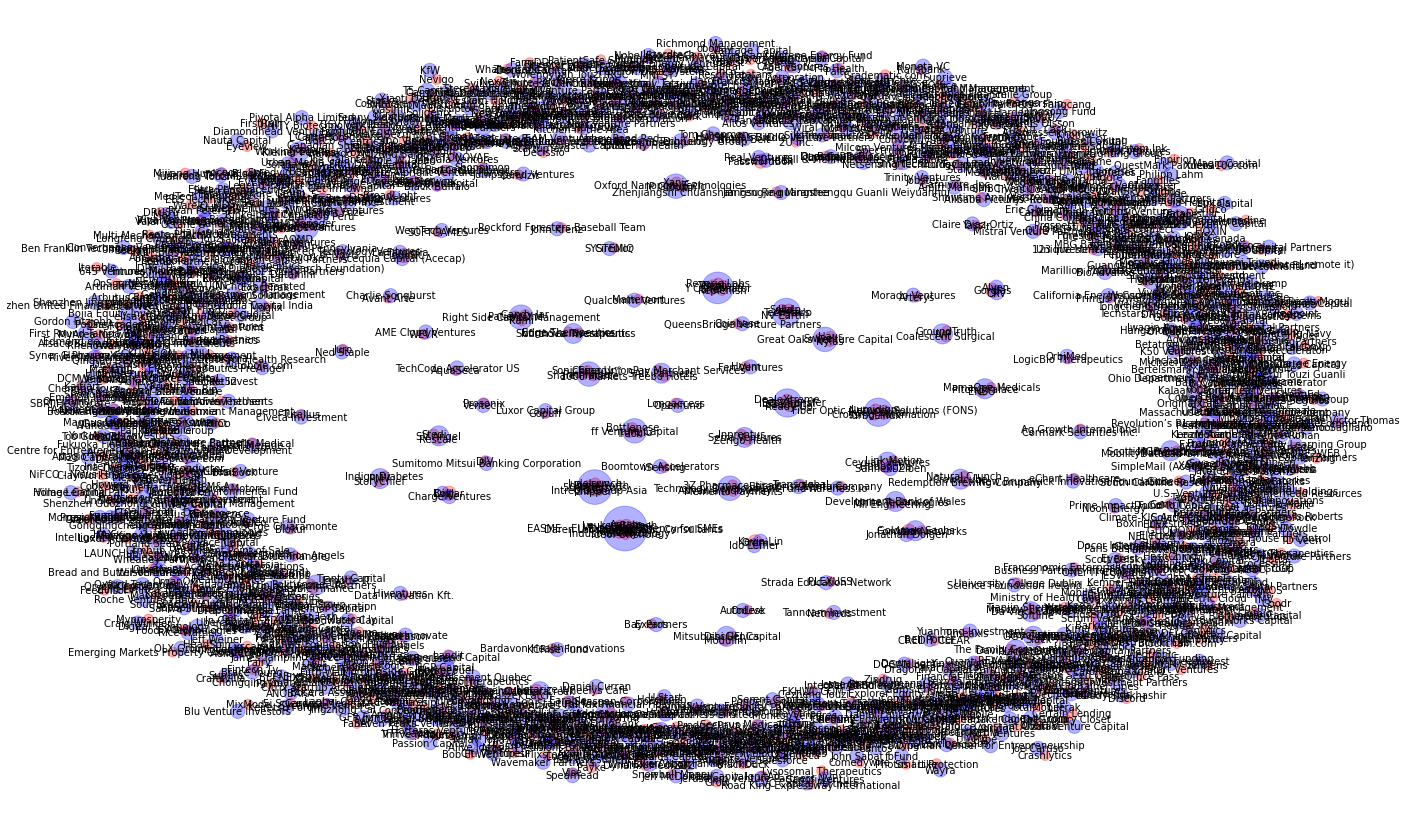

In [21]:
plot_bipartite_graph(B, small_degree=True)

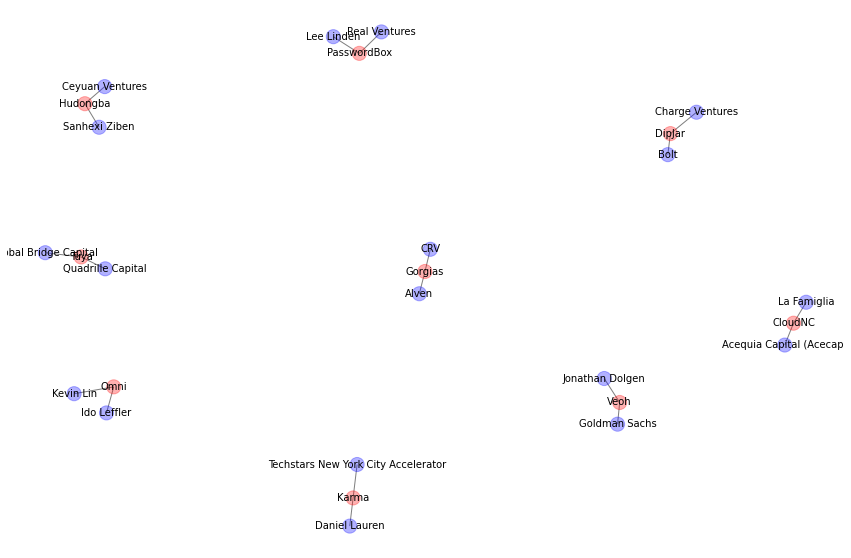

In [22]:
plot_bipartite_graph(B, small_degree=False)

### Add weights to the graph

In [23]:
df_essential.head()

,organisation_name,investor_name,investments_usd
1,Adagio Therapeutics,M28 Capital,50000000.0
2,Riparian Pharmaceuticals,Viva Ventures Biotech Fund,3000000.0
3,Green Earth Institute,PNB-INSPiRE Ethical Fund 1 Investment Business...,1837235.0
4,Carbon,Next Play Capital,260000000.0
5,CNEPAY.COM,Wofengyuan Touzi,1446263.0


In this way, df_essential contains the sum of all the investments from one investor to a specific company.

For later: check if data of investments may be useful

In [24]:
df_essential = df_essential.groupby(["organisation_name", "investor_name"]).sum("investments_usd")
df_essential.head()

,,investments_usd
organisation_name,investor_name,
1000 Markets,Pathfinder,500000.0
1000museums.com,Linda Holliday,647879.0
2U Inc.,Novak Biddle Venture Partners,32500000.0
2Wire,Weber Capital,53500000.0
360VUZ,Magnus Olsson,7093000.0


In [24]:
# add weights

